# Extracting cards from a SET board

This notebook requires opencv for python (I used opencv-python) and matplotlib to be installed in your notebooks first.

In [60]:
%reload_ext autoreload
%autoreload 2

import nbimporter
import cv2
import math
from set_utils import SetImg

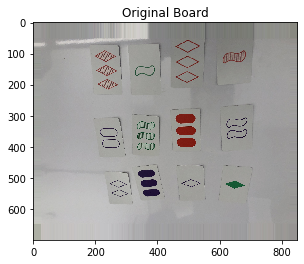

In [128]:
board = cv2.imread('./images/boards/board10.jpg', cv2.IMREAD_COLOR)
board = SetImg.rotate_bound(board, 90)
board = cv2.resize(board, (800, 600),interpolation = cv2.INTER_CUBIC)
board = cv2.copyMakeBorder(board, 50, 50, 25, 25, cv2.BORDER_REPLICATE)
SetImg.show(board, 'Original Board')

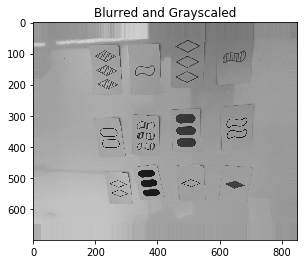

In [129]:
gray = cv2.cvtColor(board, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (1, 1), 0)
SetImg.show(blurred, 'Blurred and Grayscaled')

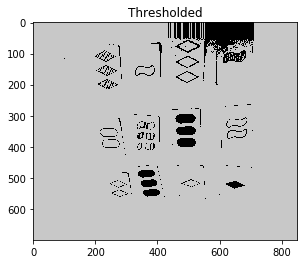

In [138]:
resultCode, thresh = cv2.threshold(blurred, 125, 200, cv2.THRESH_BINARY)
SetImg.show(thresh, 'Thresholded')

Found 1 contours


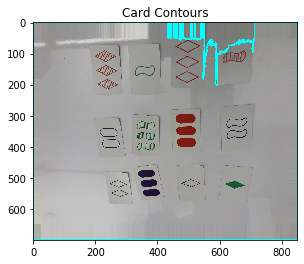

In [139]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = list(filter(lambda c: cv2.contourArea(c) > 200, contours))
print(f'Found {len(contours)} contours')
SetImg.show(cv2.drawContours(board.copy(), contours, -1, (255,255,0), 3), 'Card Contours')

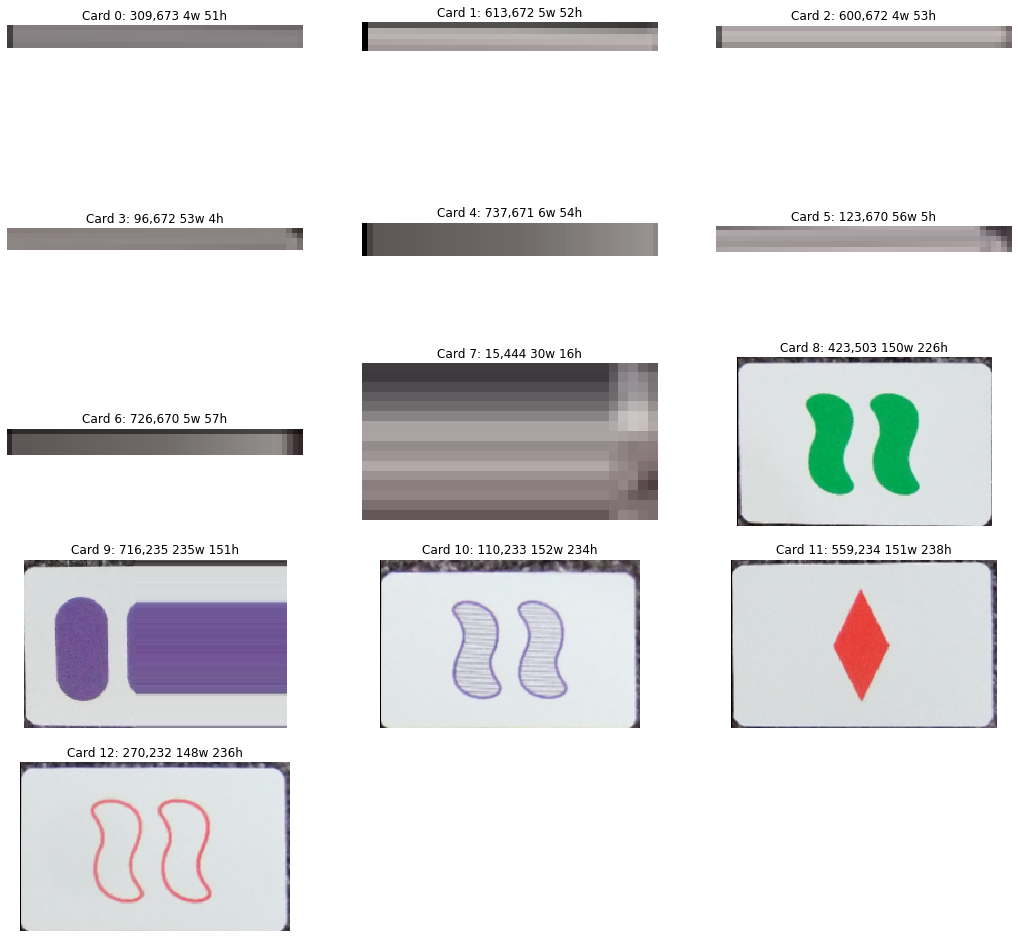

In [100]:
images = []
titles = []
for index, contour in enumerate(contours):
    rect = cv2.minAreaRect(contour)   
    cropped = SetImg.getSubImage(board.copy(), rect)
    if len(cropped):
        cv2.imwrite(f'./images/unclassified/{index}.png', cropped)
        images.append(cropped)
        titles.append(f'Card {index}: {math.floor(rect[0][0])},{math.floor(rect[0][1])} {math.floor(rect[1][0])}w {math.floor(rect[1][1])}h')
    else:
        print(f'Could not extract card {index}')
SetImg.show_horizontal(images, titles, 3)